In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
x=[]
y=[]
x0=[]
x1=[]
data=pd.read_csv("microchip.csv",header=None)
c=data[2]
for i in range(0,len(c)):
    if(c[i]==0):
        x0.append([data[0][i],data[1][i]])
    if(c[i]==1):
        x1.append([data[0][i],data[1][i]])
    x.append([data[0][i],data[1][i]])
    y.append([data[2][i]])

one=np.ones([len(x),1])
x=np.concatenate((one,x),axis=1)
x=(x-np.mean(x))/np.std(x)
y=np.array(y)
x0=np.array(x0)
x1=np.array(x1)
x0=(x0-np.mean(x0))/np.std(x0)
x1=(x1-np.mean(x1))/np.std(x1)

In [28]:

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.3)
theta = np.matrix(np.zeros(3))
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

#set gradient parameters
alpha = 0.01
iters = 1000

(81, 3) (36, 3) (81, 1) (36, 1)


parameters after gradient descent= [[-0.02398727 -0.02458423 -0.00977045]]


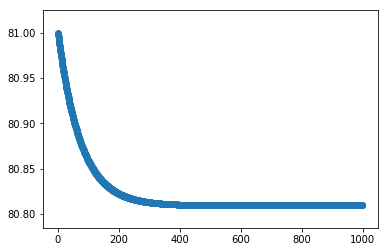

0   [1]
0   [0]
1   [1]
1   [0]
0   [0]
0   [1]
1   [0]
1   [0]
0   [1]
1   [1]
1   [1]
1   [1]
1   [0]
0   [1]
1   [0]
0   [1]
0   [1]
1   [1]
0   [1]
0   [1]
0   [0]
1   [0]
1   [1]
1   [1]
0   [1]
0   [1]
0   [1]
0   [0]
1   [0]
1   [0]
1   [1]
0   [0]
0   [0]
1   [0]
0   [0]
0   [0]
correct predictions out of 36 test points is  16
Accuracy = 44.44444444444444 %


In [29]:
## Batch Gradient Descent ##
var=100
def gradientDescent(X,Y,theta,iters,alpha):
    cost=[]
    for i in range(0,iters):
        hypothesis=X*theta.T
        hypothesis=1/(1+np.exp((-1)*hypothesis))
        temp=np.log2(hypothesis)
        temp1=np.log2(1-hypothesis)
        v1=(-1)*(np.matmul(Y.T,temp))
        v2=(-1)*(np.matmul((1-Y).T,temp1))
        loss=hypothesis-Y
        fvalue=v1+v2
        cost.append(v1+v2)
        #if i>0:
            #print("iteration=",i,"| cost=",cost[i])
        gradient=(loss.T*X)/len(X)
        theta=theta-(alpha*(gradient+var/len(X)*theta))
    return theta,cost

g,cost=gradientDescent(x_train,y_train,theta,iters,alpha)
print("parameters after gradient descent=",g)
it=np.arange(0,iters)
plt.scatter(it,np.squeeze(cost))
plt.show()

##calculating sum of squared error of the test data
tempy=np.matmul(x_test,g.transpose())
tempy=1/(1+np.exp((-1)*tempy))
tempy=np.where(tempy>=0.5,1,0)
tempy=np.squeeze(tempy)
count=0
for i in range(0,len(tempy)):
    print(tempy[i]," ",y_test[i])
    if(tempy[i]==y_test[i]):
        count=count+1
print("correct predictions out of 36 test points is ",count)
print("Accuracy =",count/len(tempy)*100,"%")

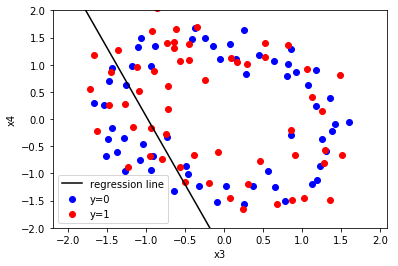

In [30]:
##Using entire dataset for plotting the graph as there are lesser test points
plt.scatter([x0[:,0]],[x0[:,1]],c='b',label='y=0')
plt.scatter([x1[:,0]],[x1[:,1]],c='r',label='y=1')
x3=np.arange(-2,2,0.1)
x4=-(g[0,0]+g[0,1]*x3)/g[0,2]
plt.plot(x3,x4,c='k',label='regression line')
plt.xlabel('x3')
plt.ylabel('x4')
plt.legend()
plt.ylim([-2,2])
plt.show()